1. Càrrega i Visió General:

Importació de llibreries, càrrega de dades.

.head(), .info(), .describe() per tenir una primera impressió.

Anàlisi de valors nuls (missing values) i duplicats.

2. Anàlisi Univariada:

Distribució de cada variable clau. Histograma per a les numèriques, gràfic de barres per a les categòriques.

Anàlisi específica de la variable objectiu (target). (Ex: "El dataset està desbalancejat: només un 22% dels clients fan impagament").

3. Anàlisi Bivariada:

Correlació: Matriu de correlació (heatmap) per a variables numèriques.

Relació amb el Target: Com es relaciona cada característica amb la probabilitat d'impagament? Utilitza box plots (numèrica vs. target) i gràfics de barres agrupats (categòrica vs. target). Aquí comencen a sorgir les primeres hipòtesis.

4. Conclusions de l'EDA:

Hem observat que els clients amb límits de crèdit més baixos i els que tenen retards en els pagaments recents presenten una taxa d'impagament molt superior. 
Les variables PAY_0, PAY_2 i LIMIT_BAL semblen molt prometedores.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [6]:
df = pd.read_csv(r"C:\Users\ferra\OneDrive\Documentos\Ubiqum\The Credit One Project\credit_one.csv")  # Assegura que tens el fitxer a la mateixa carpeta
df = df.drop('ID', axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
# No cal fer res amb nuls o NaN

HISTOGRAMES

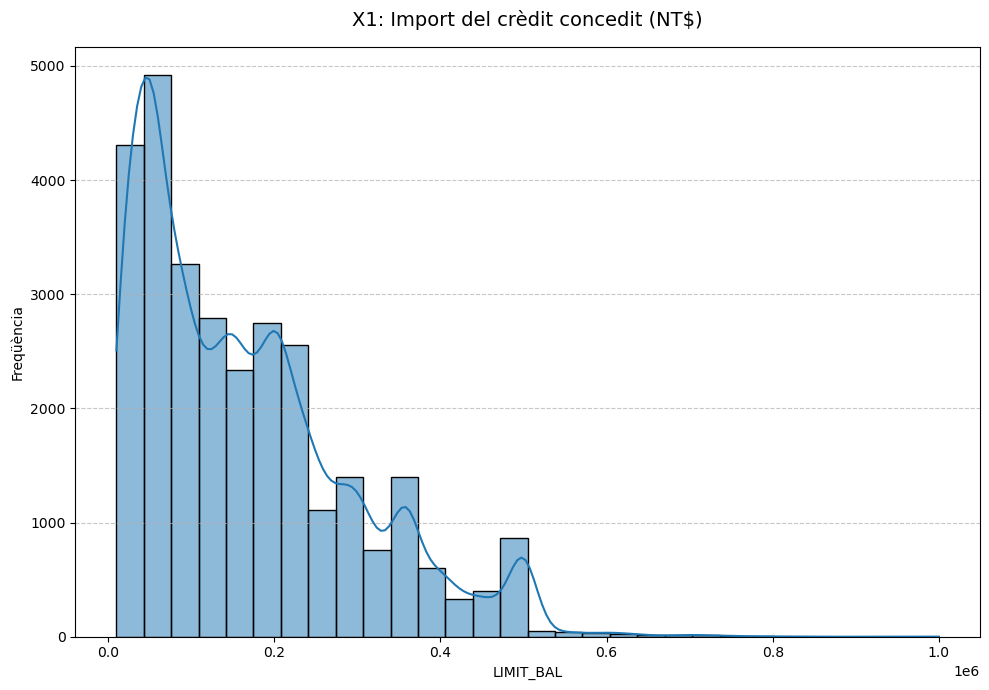

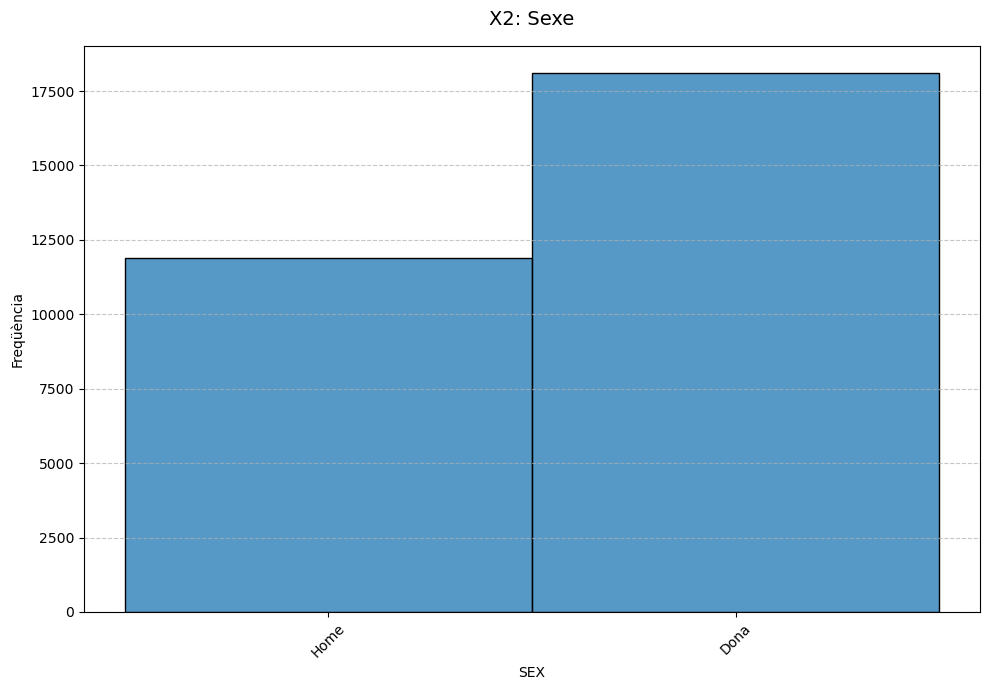

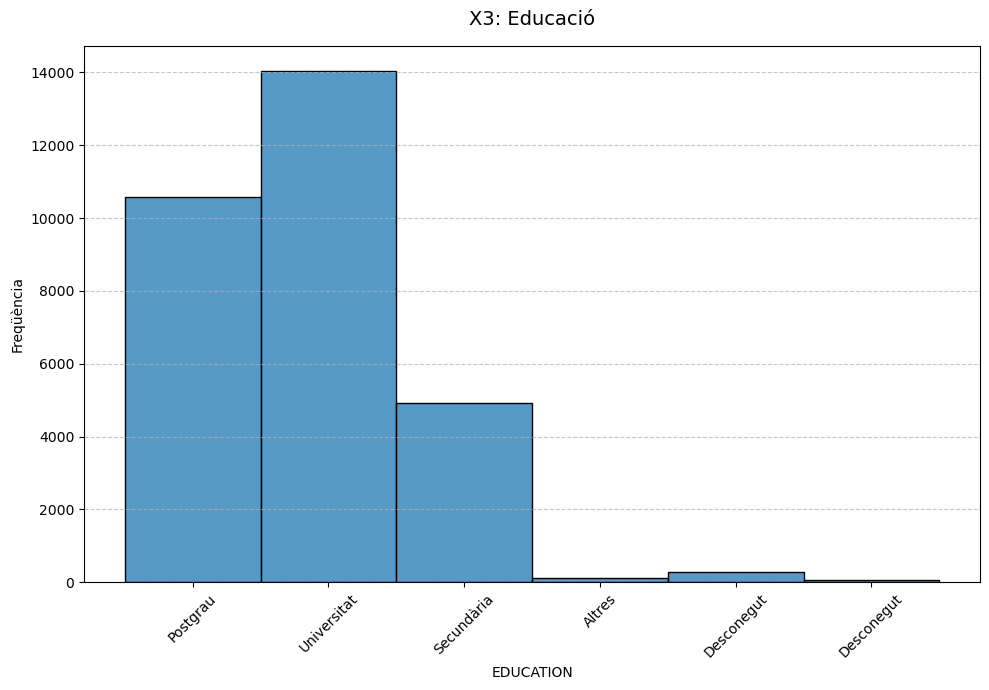

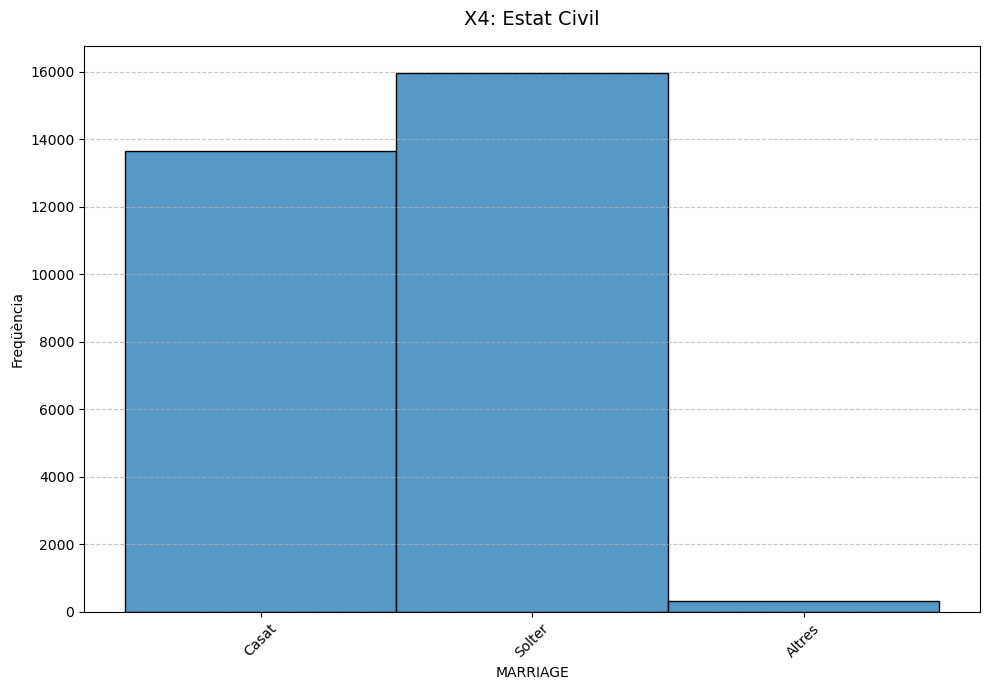

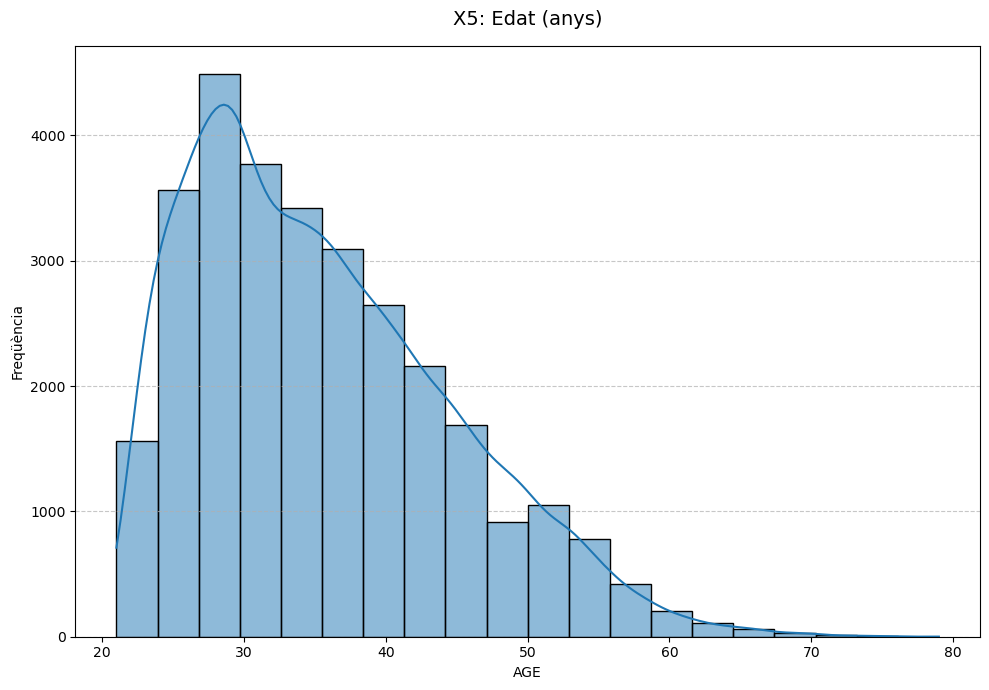

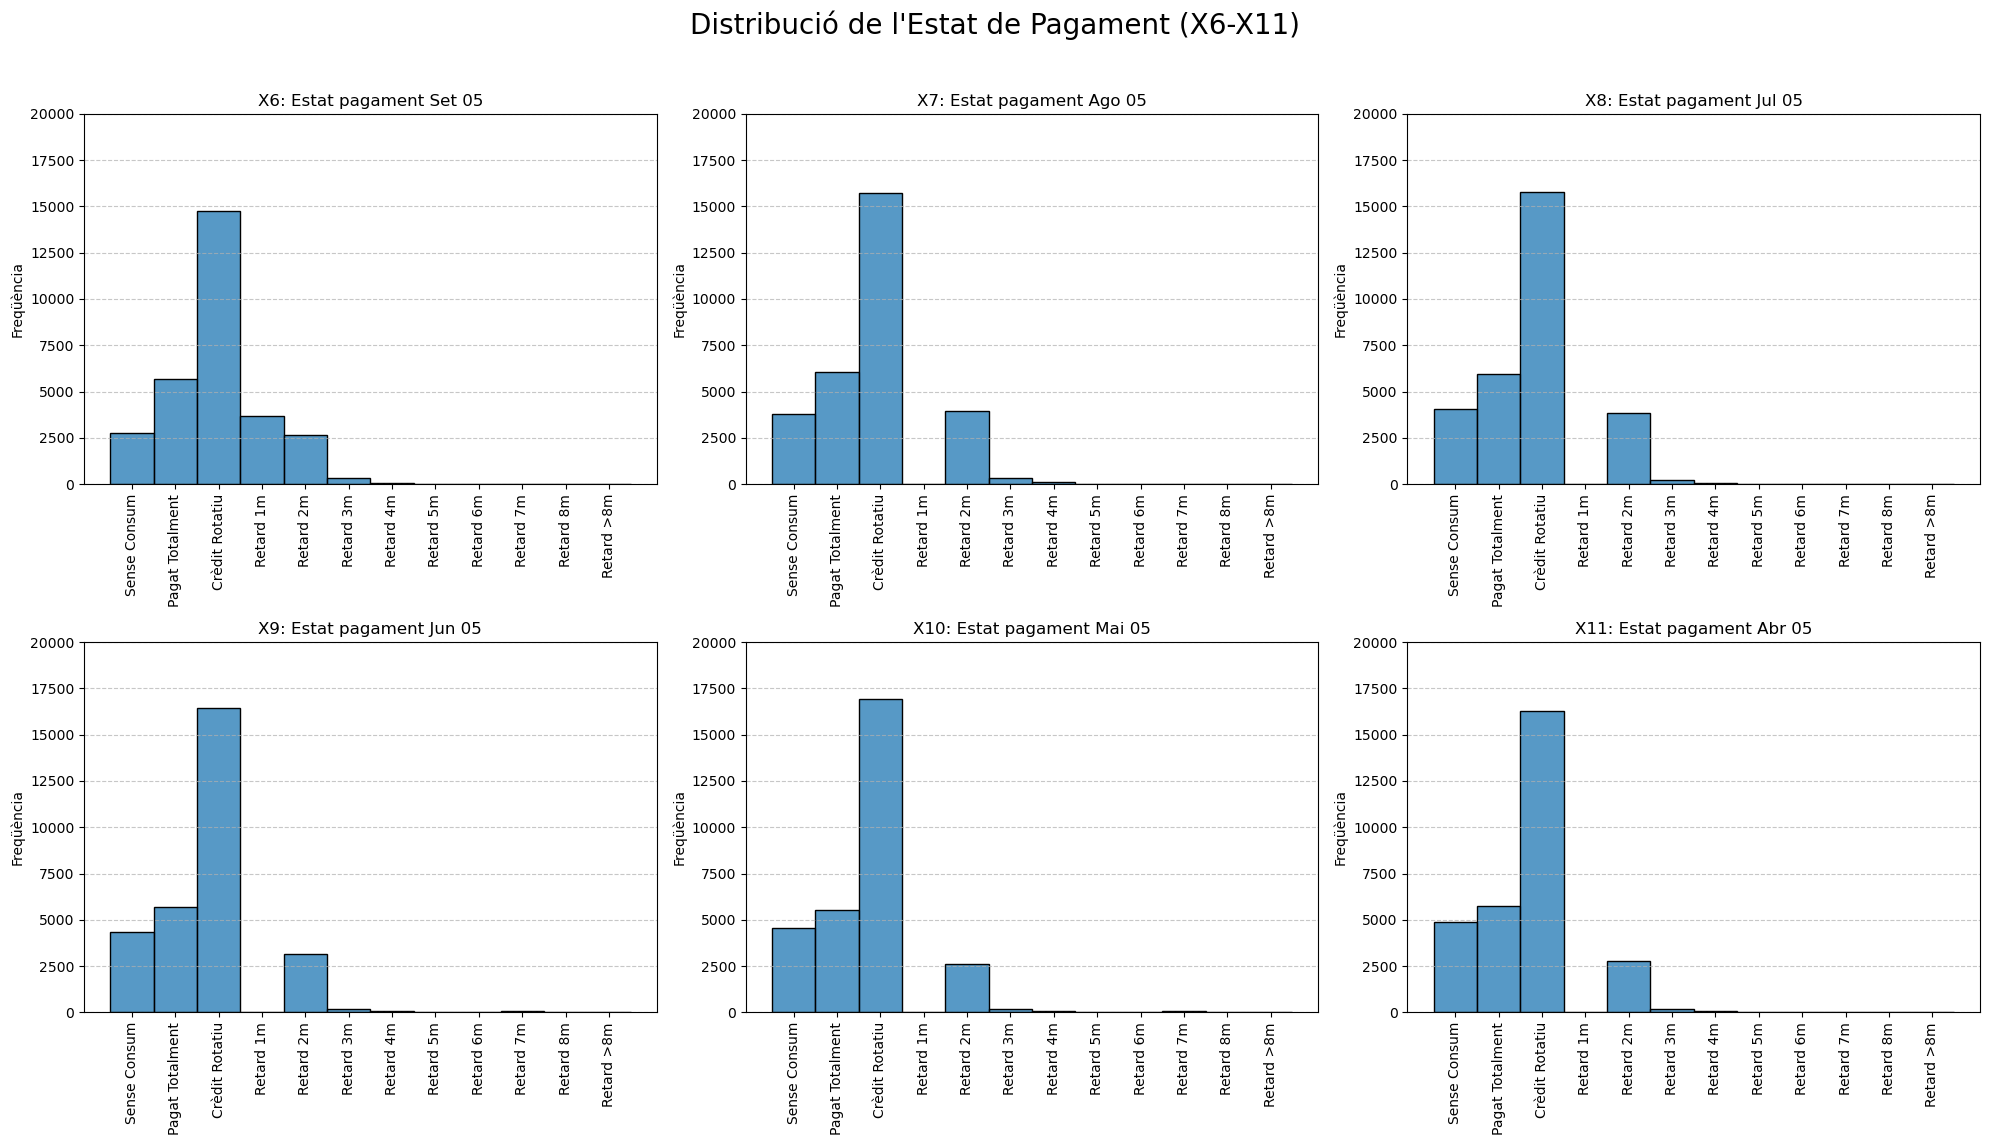

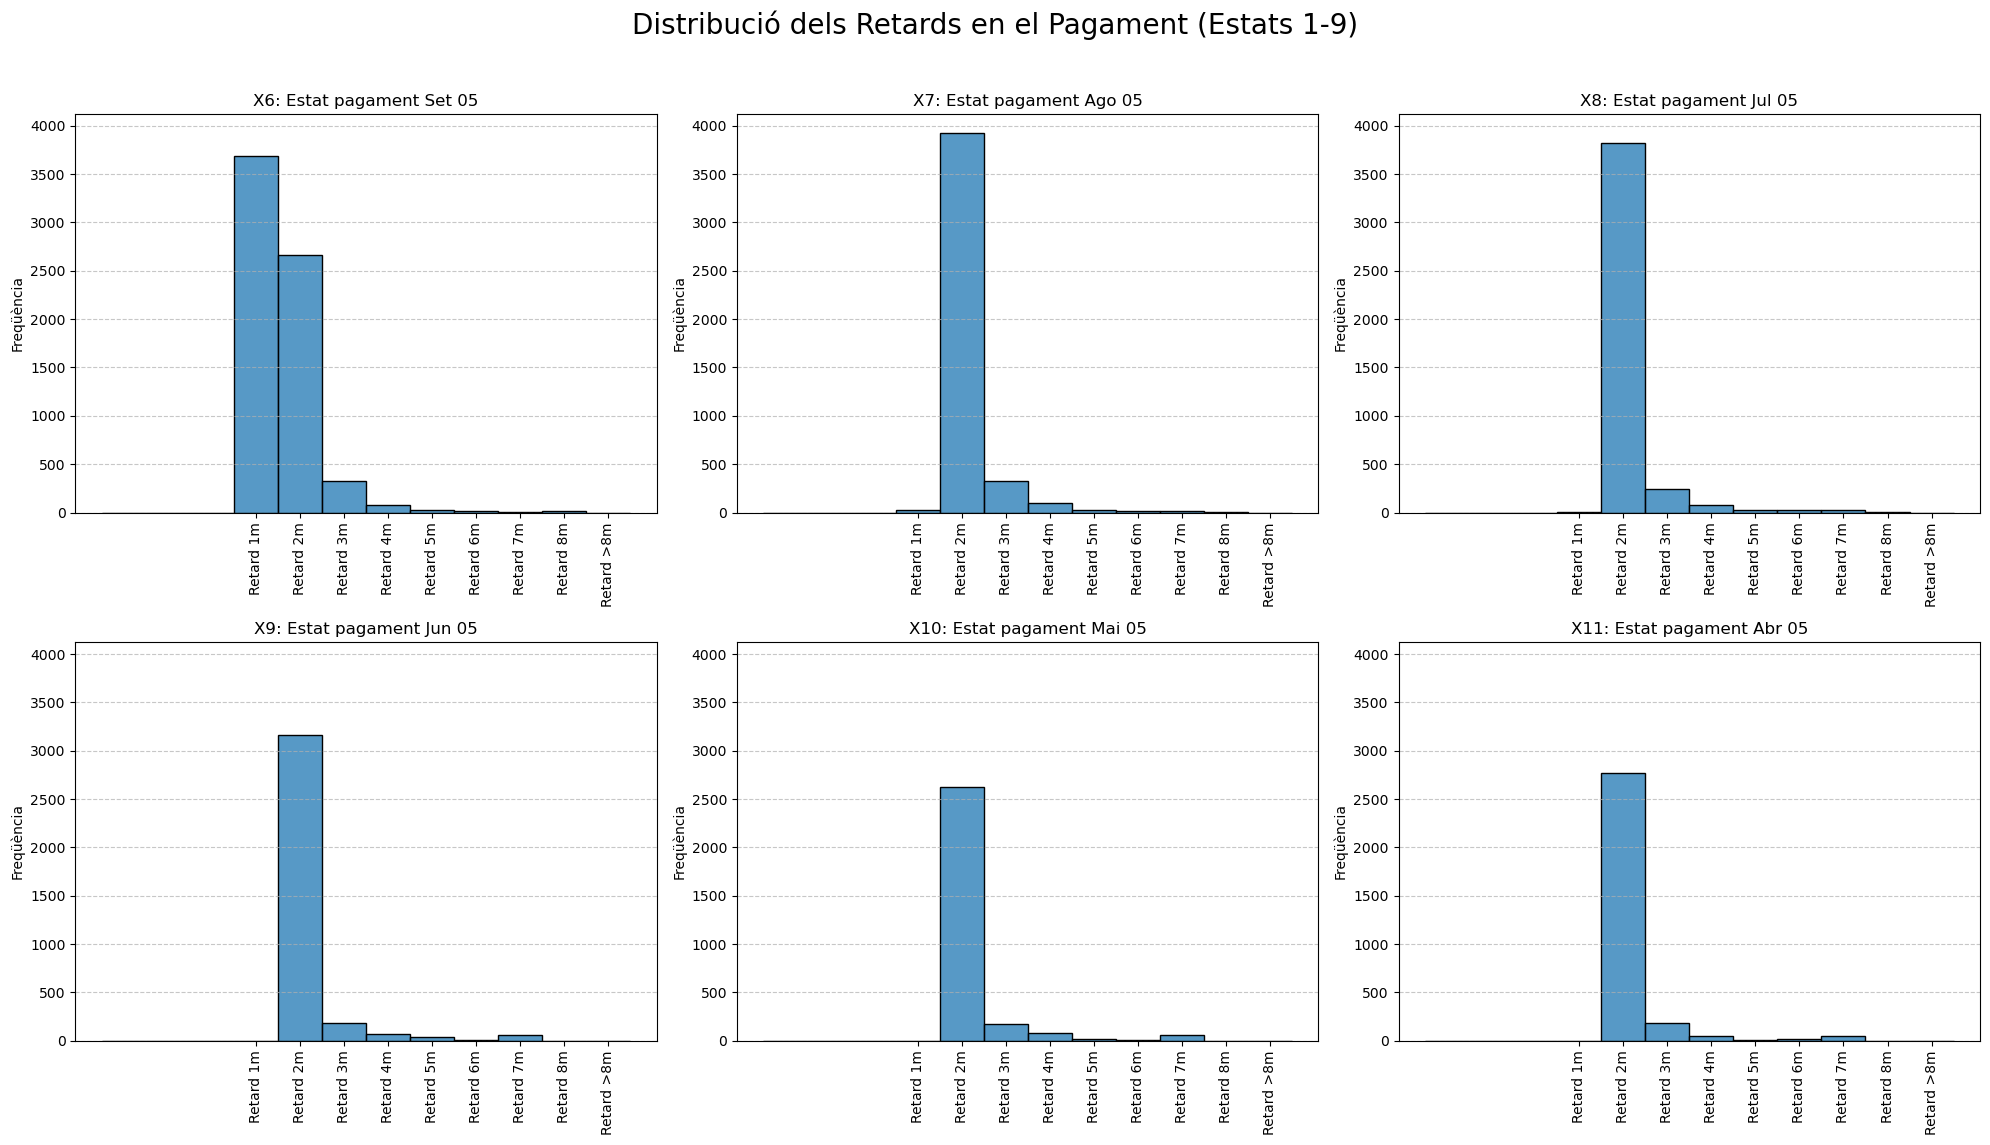

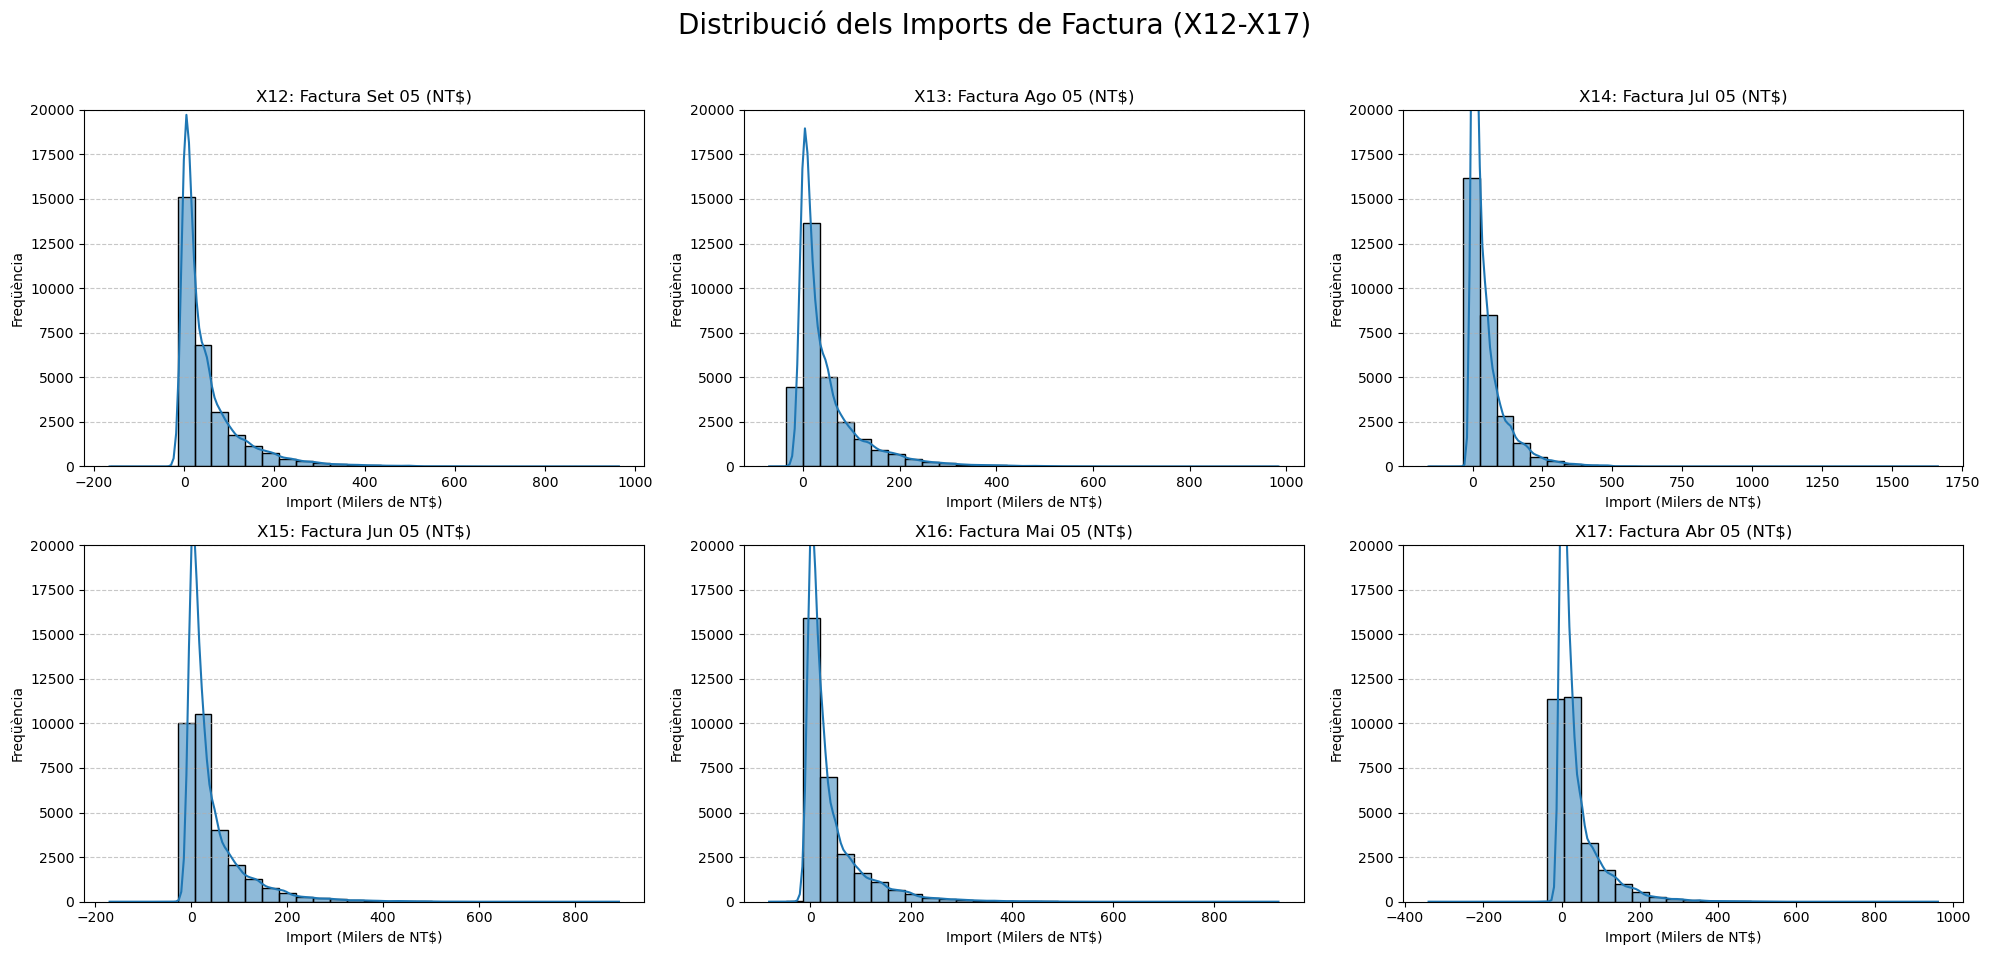

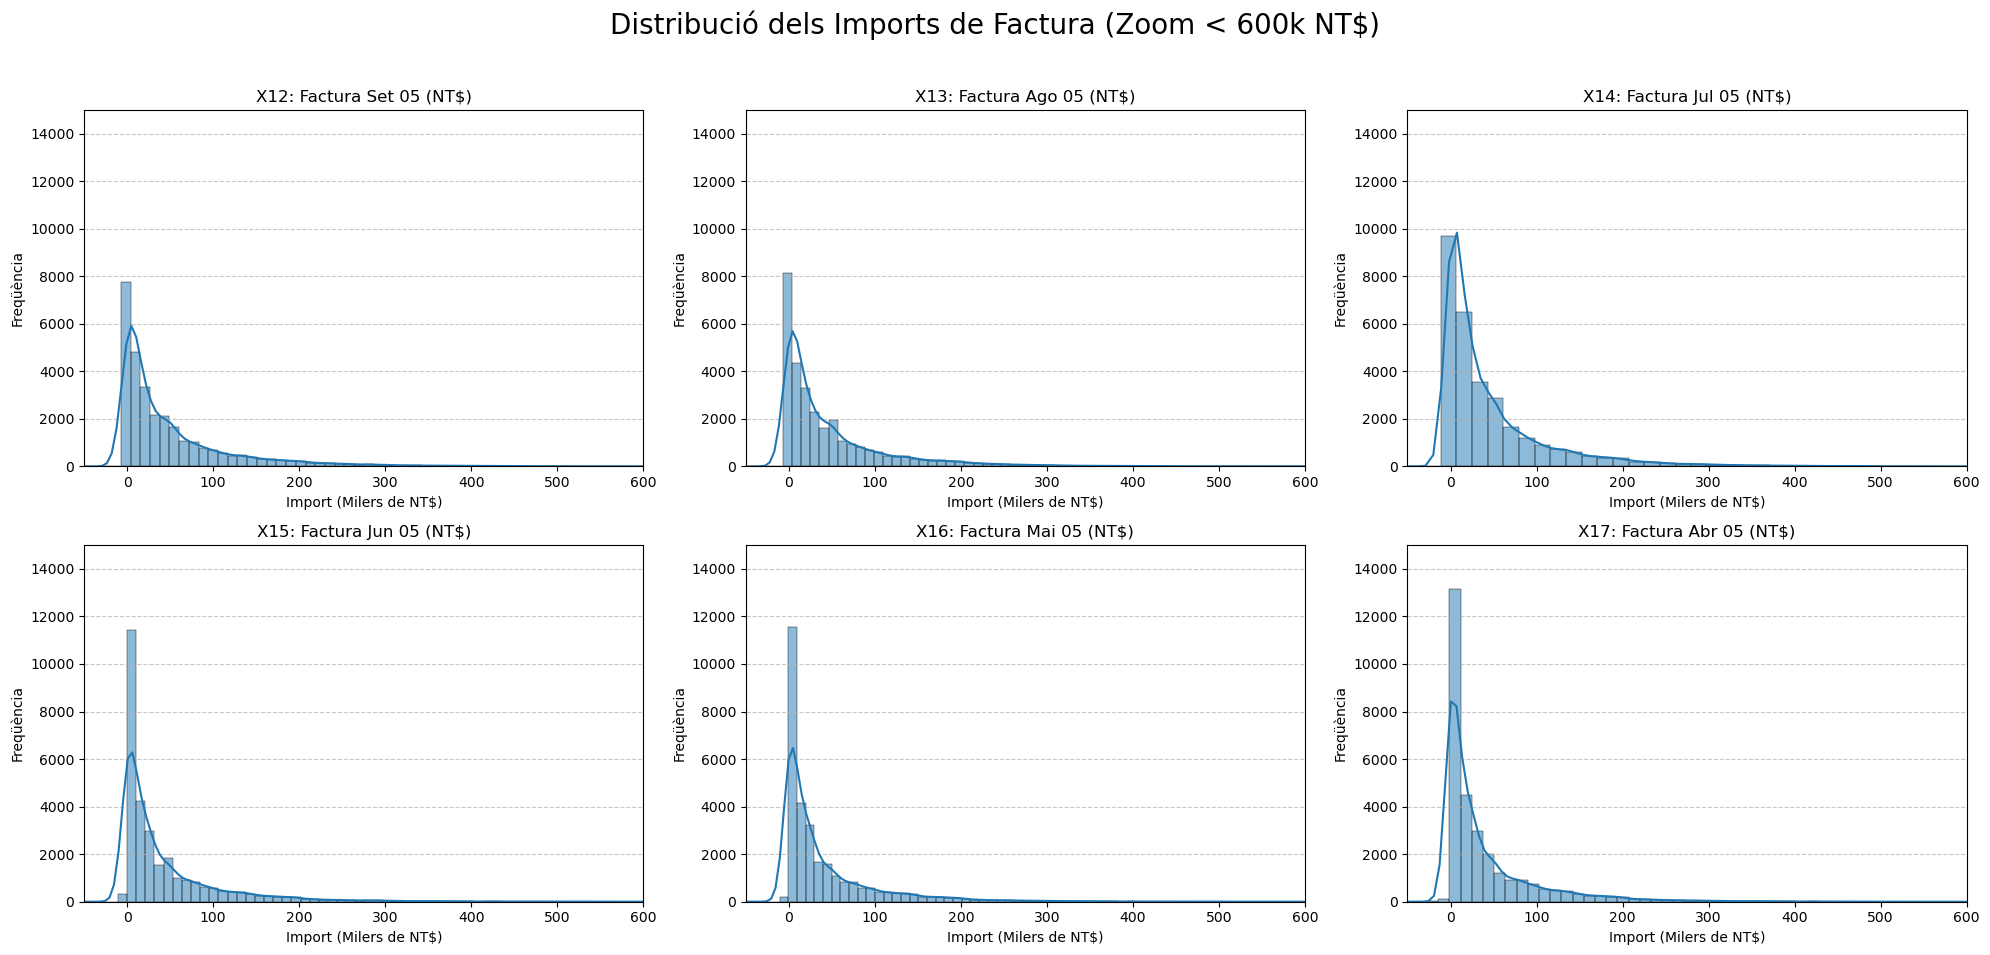

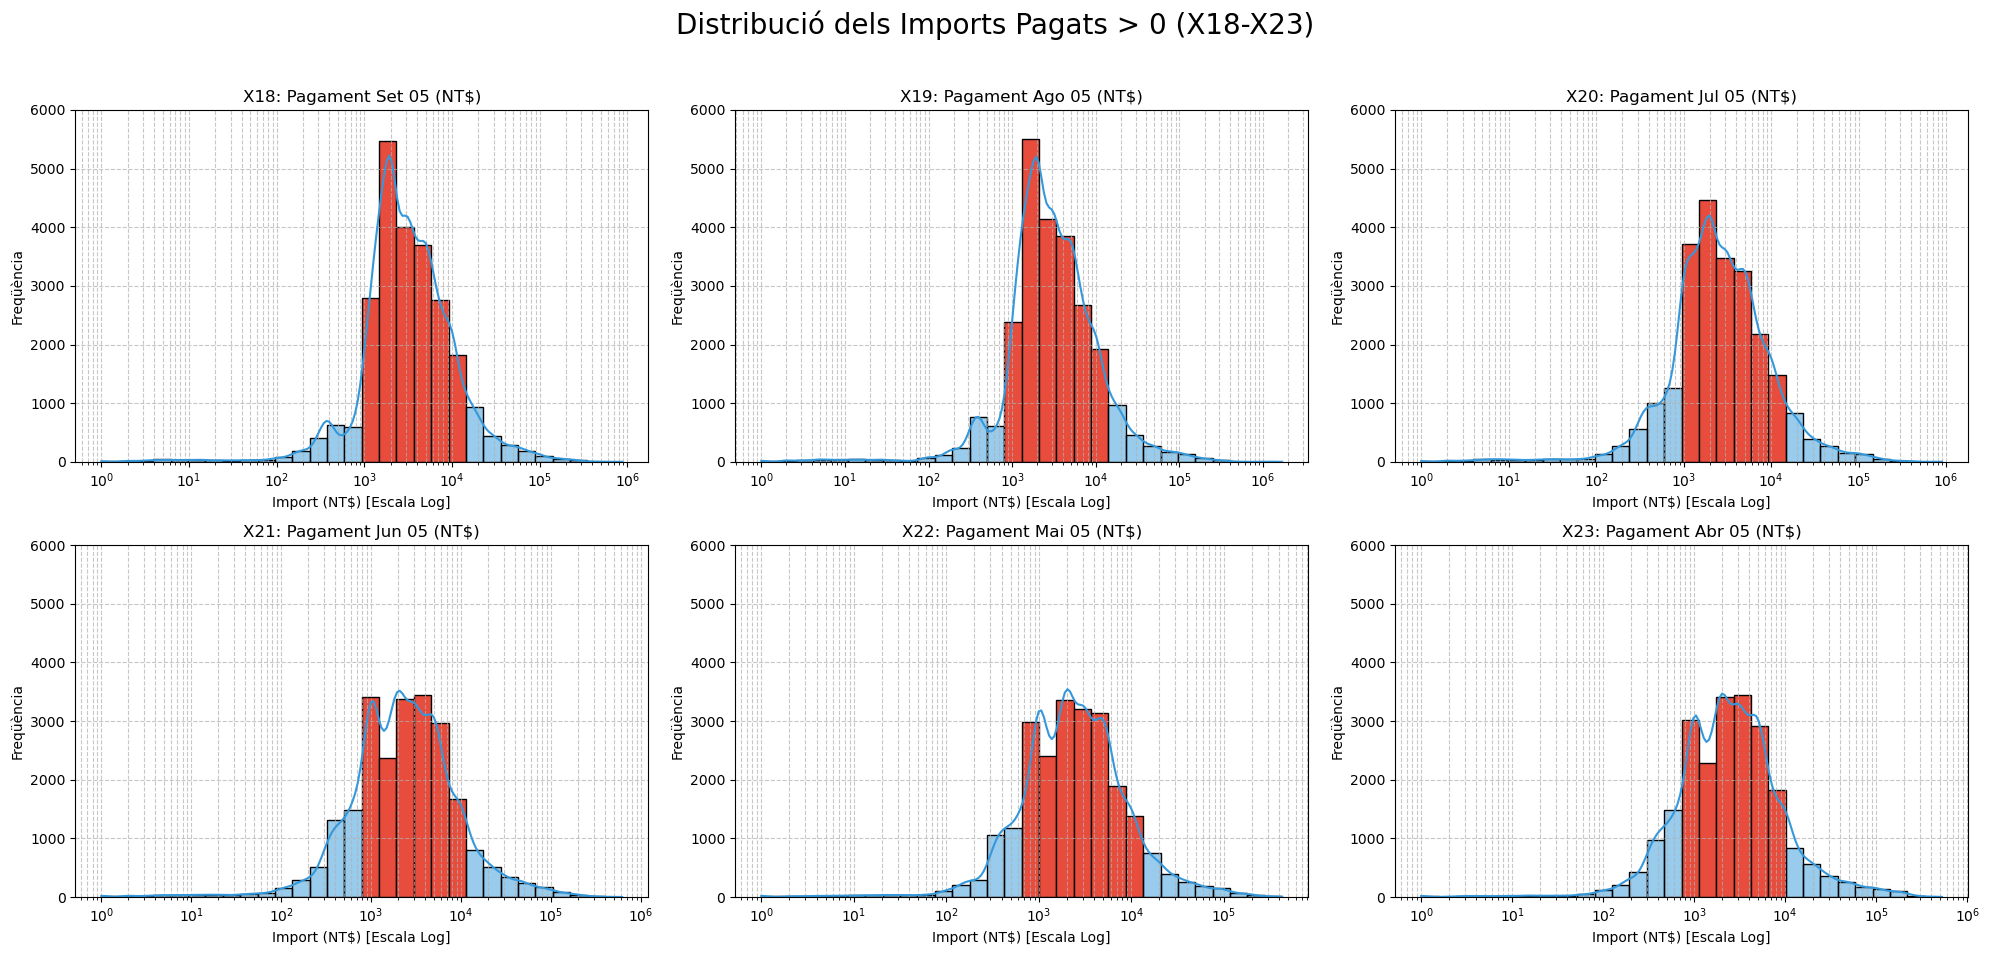

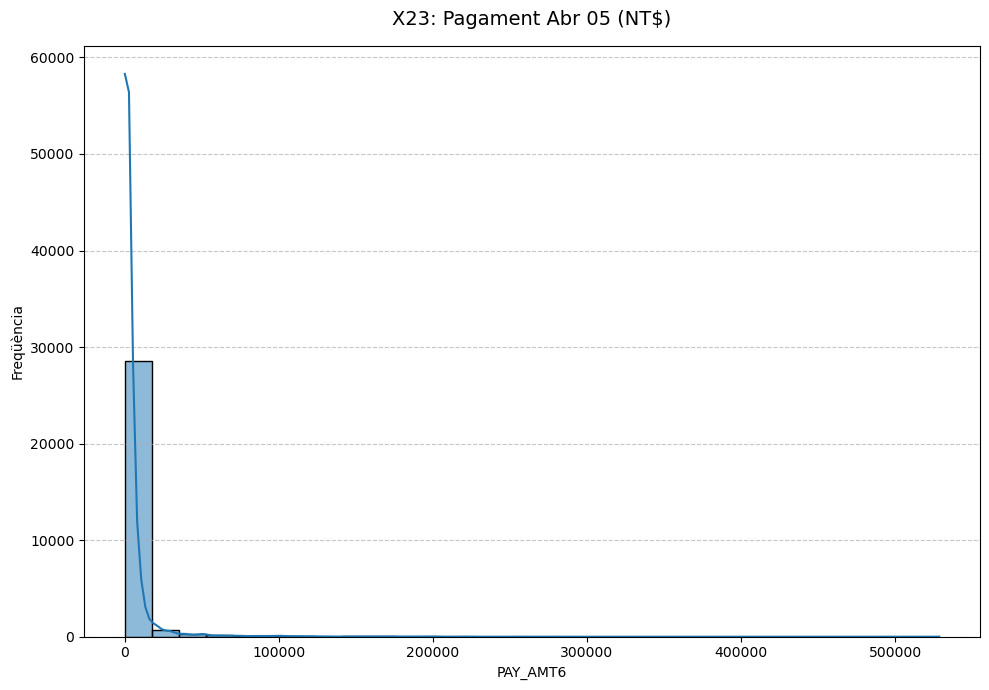

C:\Users\ferra\AppData\Local\Temp\ipykernel_23800\3800970622.py:266: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


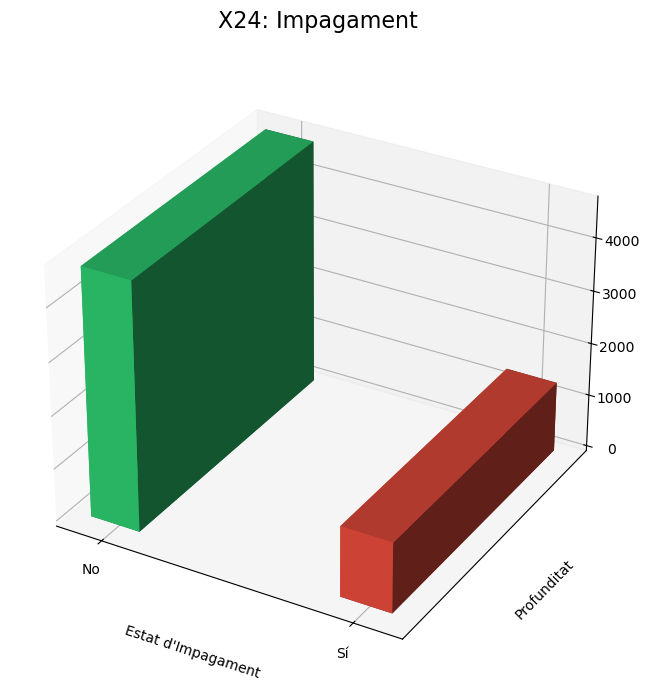

In [17]:
# --- Versió Millorada i Personalitzada amb Descripcions i Bins Específics ---
 
# Diccionari amb la descripció (X1, X2...) i configuració de 'bins' per a cada variable.
# Això permet un control detallat sobre cada gràfic.

# Configuració comuna per a les columnes PAY_* per evitar repetició
pay_ticks = range(-2, 10)
pay_labels = [
    'Sense Consum',   # -2
    'Pagat Totalment',# -1
    'Crèdit Rotatiu', # 0
    'Retard 1m',      # 1
    'Retard 2m',      # 2
    'Retard 3m',      # 3
    'Retard 4m',      # 4
    'Retard 5m',      # 5
    'Retard 6m',      # 6
    'Retard 7m',      # 7
    'Retard 8m',      # 8
    'Retard >8m'      # 9
]
pay_config = {
    'bins': np.arange(-2.5, 10.5, 1), 
    'kde': False, 
    'xticks': pay_ticks, 
    'xticklabels': pay_labels
}

plot_info = {
    'LIMIT_BAL': {'desc': 'X1: Import del crèdit concedit (NT$)', 'bins': 30, 'kde': True},
    'SEX': {'desc': 'X2: Sexe', 'bins': [0.5, 1.5, 2.5], 'xticks': [1, 2], 'xticklabels': ['Home', 'Dona'], 'kde': False},
    'EDUCATION': {'desc': 'X3: Educació', 'bins': np.arange(0.5, 7.5, 1), 'xticks': range(1, 7), 'xticklabels': ['Postgrau', 'Universitat', 'Secundària', 'Altres', 'Desconegut', 'Desconegut'], 'kde': False},
    'MARRIAGE': {'desc': 'X4: Estat Civil', 'bins': np.arange(0.5, 4.5, 1), 'xticks': range(1, 4), 'xticklabels': ['Casat', 'Solter', 'Altres'], 'kde': False},
    'AGE': {'desc': 'X5: Edat (anys)', 'bins': 20, 'kde': True},
    
    'PAY_0': {'desc': 'X6: Estat pagament Set 05', **pay_config},
    'PAY_2': {'desc': 'X7: Estat pagament Ago 05', **pay_config},
    'PAY_3': {'desc': 'X8: Estat pagament Jul 05', **pay_config},
    'PAY_4': {'desc': 'X9: Estat pagament Jun 05', **pay_config},
    'PAY_5': {'desc': 'X10: Estat pagament Mai 05', **pay_config},
    'PAY_6': {'desc': 'X11: Estat pagament Abr 05', **pay_config},

    'BILL_AMT1': {'desc': 'X12: Factura Set 05 (NT$)', 'bins': 30, 'kde': True},
    'BILL_AMT2': {'desc': 'X13: Factura Ago 05 (NT$)', 'bins': 30, 'kde': True},
    'BILL_AMT3': {'desc': 'X14: Factura Jul 05 (NT$)', 'bins': 30, 'kde': True},
    'BILL_AMT4': {'desc': 'X15: Factura Jun 05 (NT$)', 'bins': 30, 'kde': True},
    'BILL_AMT5': {'desc': 'X16: Factura Mai 05 (NT$)', 'bins': 30, 'kde': True},
    'BILL_AMT6': {'desc': 'X17: Factura Abr 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT1': {'desc': 'X18: Pagament Set 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT2': {'desc': 'X19: Pagament Ago 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT3': {'desc': 'X20: Pagament Jul 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT4': {'desc': 'X21: Pagament Jun 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT5': {'desc': 'X22: Pagament Mai 05 (NT$)', 'bins': 30, 'kde': True},
    'PAY_AMT6': {'desc': 'X23: Pagament Abr 05 (NT$)', 'bins': 30, 'kde': True},
    'default payment next month': {'desc': 'X24: Impagament', 'bins': [-0.5, 0.5, 1.5], 'xticks': [0, 1], 'xticklabels': ['No', 'Sí'], 'kde': False}
}
 
# Defineix els grups de columnes
pay_status_cols = [f'PAY_{i}' for i in [0, 2, 3, 4, 5, 6]]
bill_amt_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
 
# Llista de columnes a graficar, en l'ordre desitjat pel diccionari
columns_to_plot = list(plot_info.keys())
 
# Itera sobre les columnes, agrupant-les quan correspongui
i = 0
while i < len(columns_to_plot):
    column = columns_to_plot[i]

    # --- Grup 1: Graella per a l'Estat de Pagament (PAY_*) ---
    if column == 'PAY_0':
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.flatten()
        fig.suptitle('Distribució de l\'Estat de Pagament (X6-X11)', fontsize=20)

        for idx, pay_col in enumerate(pay_status_cols):
            ax = axes[idx]
            info = plot_info[pay_col]
            sns.histplot(data=df, x=pay_col, bins=info['bins'], kde=info.get('kde', False), ax=ax)
            ax.set_title(info['desc'])
            ax.set_xlabel('')
            ax.set_ylabel('Freqüència')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            # Fixa l'escala de l'eix Y per a una comparació visual consistent
            ax.set_ylim(0, 20000)
            ax.set_xticks(info['xticks'])
            ax.set_xticklabels(info['xticklabels'], rotation=90)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()
        i += len(pay_status_cols)

        # --- Grup 1.1: Graella addicional NOMÉS per a Retards (PAY_* >= 1) ---
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.flatten()
        fig.suptitle('Distribució dels Retards en el Pagament (Estats 1-9)', fontsize=20)

        # Calculem el límit màxim per a l'eix Y per a una escala consistent
        max_y_limit = 0
        for pay_col in pay_status_cols:
            counts = df[df[pay_col] >= 1][pay_col].value_counts()
            if not counts.empty:
                max_y_limit = max(max_y_limit, counts.max())

        for idx, pay_col in enumerate(pay_status_cols):
            ax = axes[idx]
            info = plot_info[pay_col]
            # Filtrem les dades per mostrar només els retards (valors >= 1)
            data_retard = df[df[pay_col] >= 1]
            
            sns.histplot(data=data_retard, x=pay_col, bins=info['bins'], kde=False, ax=ax)
            ax.set_title(info['desc'])
            ax.set_xlabel('')
            ax.set_ylabel('Freqüència')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.set_ylim(0, max_y_limit * 1.05) # Apliquem el límit Y calculat
            ax.set_xticks(info['xticks'][3:]) # Mostrem ticks només a partir de 'Retard 1m'
            ax.set_xticklabels(info['xticklabels'][3:], rotation=90) # Mostrem etiquetes només per als retards
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()

    # --- Grup 2: Graella per als Imports de Factura (BILL_AMT*) ---
    elif column == 'BILL_AMT1':
        fig, axes = plt.subplots(2, 3, figsize=(20, 10))
        axes = axes.flatten()
        fig.suptitle('Distribució dels Imports de Factura (X12-X17)', fontsize=20)

        for idx, bill_col in enumerate(bill_amt_cols):
            ax = axes[idx]
            info = plot_info[bill_col]
            # Dibuixem l'histograma amb els valors en milers
            sns.histplot(x=df[bill_col] / 1000, bins=info['bins'], kde=info.get('kde', True), ax=ax)
            ax.set_title(info['desc'])
            ax.set_xlabel('Import (Milers de NT$)')
            ax.set_ylabel('Freqüència')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            # Fixa l'escala de l'eix Y per a una comparació visual consistent
            ax.set_ylim(0, 20000)

        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()

        # --- Grup 2.1: Graella addicional per a Imports de Factura (Zoom < 600k) ---
        fig, axes = plt.subplots(2, 3, figsize=(20, 10))
        axes = axes.flatten()
        fig.suptitle('Distribució dels Imports de Factura (Zoom < 600k NT$)', fontsize=20)

        for idx, bill_col in enumerate(bill_amt_cols):
            ax = axes[idx]
            info = plot_info[bill_col]
            # Dibuixem l'histograma amb més 'bins' per a un millor detall en el zoom
            sns.histplot(x=df[bill_col] / 1000, bins=100, kde=info.get('kde', True), ax=ax)
            ax.set_title(info['desc'])
            ax.set_xlabel('Import (Milers de NT$)')
            ax.set_ylabel('Freqüència')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            # Fixem l'escala de l'eix X per al zoom. Permetem que l'eix Y s'ajusti automàticament.
            ax.set_xlim(-50, 600)
            # Fixem l'escala de l'eix Y per a una comparació visual consistent en el zoom
            ax.set_ylim(0, 15000)

        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()
        i += len(bill_amt_cols)

    # --- Grup 3: Graella per als Imports Pagats (PAY_AMT*) ---
    elif column == 'PAY_AMT1':
        fig, axes = plt.subplots(2, 3, figsize=(20, 10))
        axes = axes.flatten()
        fig.suptitle('Distribució dels Imports Pagats > 0 (X18-X23)', fontsize=20)

        for idx, pay_amt_col in enumerate(pay_amt_cols):
            ax = axes[idx]
            info = plot_info[pay_amt_col]
            # Filtrem les dades per evitar l'error amb log(0) i visualitzar només els pagaments realitzats
            data_to_plot = df[df[pay_amt_col] > 0]
            
            # Dibuixem l'histograma principal amb un color base
            sns.histplot(data=data_to_plot, x=pay_amt_col, bins=info['bins'], kde=info.get('kde', True), ax=ax, log_scale=True, color='#3498db')
            
            # --- Lògica per ombrejar el rang [bin anterior a 1000, 10000) ---
            patches = ax.patches
            first_highlight_index = -1
            
            # 1. Trobem l'índex de la primera barra que comença a 1000 o més
            for i, patch in enumerate(patches):
                if patch.get_x() >= 1000:
                    first_highlight_index = i
                    break
            
            # 2. Definim el nou límit inferior per a l'ombrejat
            lower_bound = 1000 # Per defecte, el límit original
            if first_highlight_index > 0:
                # Si hi ha una barra abans, el nou límit és l'inici d'aquesta barra anterior
                lower_bound = patches[first_highlight_index - 1].get_x()
            elif first_highlight_index == 0:
                # Si la primera barra ja compleix, el nou límit és el seu propi inici
                lower_bound = patches[0].get_x()
                
            # 3. Apliquem el color amb el nou límit calculat
            for patch in patches:
                bar_x_start = patch.get_x()
                if lower_bound <= bar_x_start < 10000:
                    patch.set_facecolor('#e74c3c') # Un vermell per destacar
            
            ax.set_title(info['desc'])
            ax.set_xlabel('Import (NT$) [Escala Log]')
            ax.set_ylabel('Freqüència')
            ax.grid(which='both', linestyle='--', alpha=0.7)
            # Fixa l'escala de l'eix Y per a una comparació visual consistent
            ax.set_ylim(0, 6000)

        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        plt.show()
        i += len(pay_amt_cols)

    # --- Gràfics Individuals (3D per a 'default', 2D per a la resta) ---
    else:
        info = plot_info[column]

        if column == 'default payment next month':
            # --- Gràfic 3D específic per a 'default payment next month' ---
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            # Obtenim els recomptes per a cada categoria (0=No, 1=Sí)
            counts = df[column].value_counts().reindex(info['xticks'], fill_value=0).values
            x_pos = np.array(info['xticks'])

            # Dibuixem les barres en 3D
            z_pos = np.zeros_like(counts)  # Les barres comencen a z=0
            dx = 0.2  # Amplada de les barres (eix X) - Més estret per a un efecte de prisma
            dy = 0.020 # Profunditat reduïda en un 70% (0.15 * 0.3)
            dz = counts * 0.2  # Alçada de les barres (eix Z) al 20% del valor real

            ax.bar3d(x_pos - dx/2, np.zeros_like(x_pos, dtype=float), z_pos, dx, dy, dz, shade=True, color=['#2ecc71', '#e74c3c'])

            # Configuració del gràfic 3D
            ax.set_title(info['desc'], fontsize=16, pad=25)
            ax.set_xlabel("Estat d'Impagament", labelpad=15)
            ax.set_ylabel("Profunditat", labelpad=10)
            ax.set_zlabel('Freqüència', labelpad=10)
            ax.set_yticks([])  # Amaguem els ticks de l'eix Y (profunditat)

            # Configurem les etiquetes de l'eix X
            ax.set_xticks(info['xticks'])
            ax.set_xticklabels(info['xticklabels'])
        else:
            # --- Gràfics 2D per a la resta de variables individuals ---
            plt.figure(figsize=(10, 7))
            ax = plt.gca()
            sns.histplot(data=df, x=column, bins=info['bins'], kde=info.get('kde', False), ax=ax)
            ax.set_title(info['desc'], fontsize=14, pad=15)
            ax.set_xlabel(column)
            ax.set_ylabel('Freqüència')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            if 'xticks' in info:
                ax.set_xticks(info['xticks'])
                if 'xticklabels' in info:
                    ax.set_xticklabels(info['xticklabels'])
            if column in ['SEX', 'EDUCATION', 'MARRIAGE']:
                ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        i += 1

Analisi Bivariada - Mapa calor

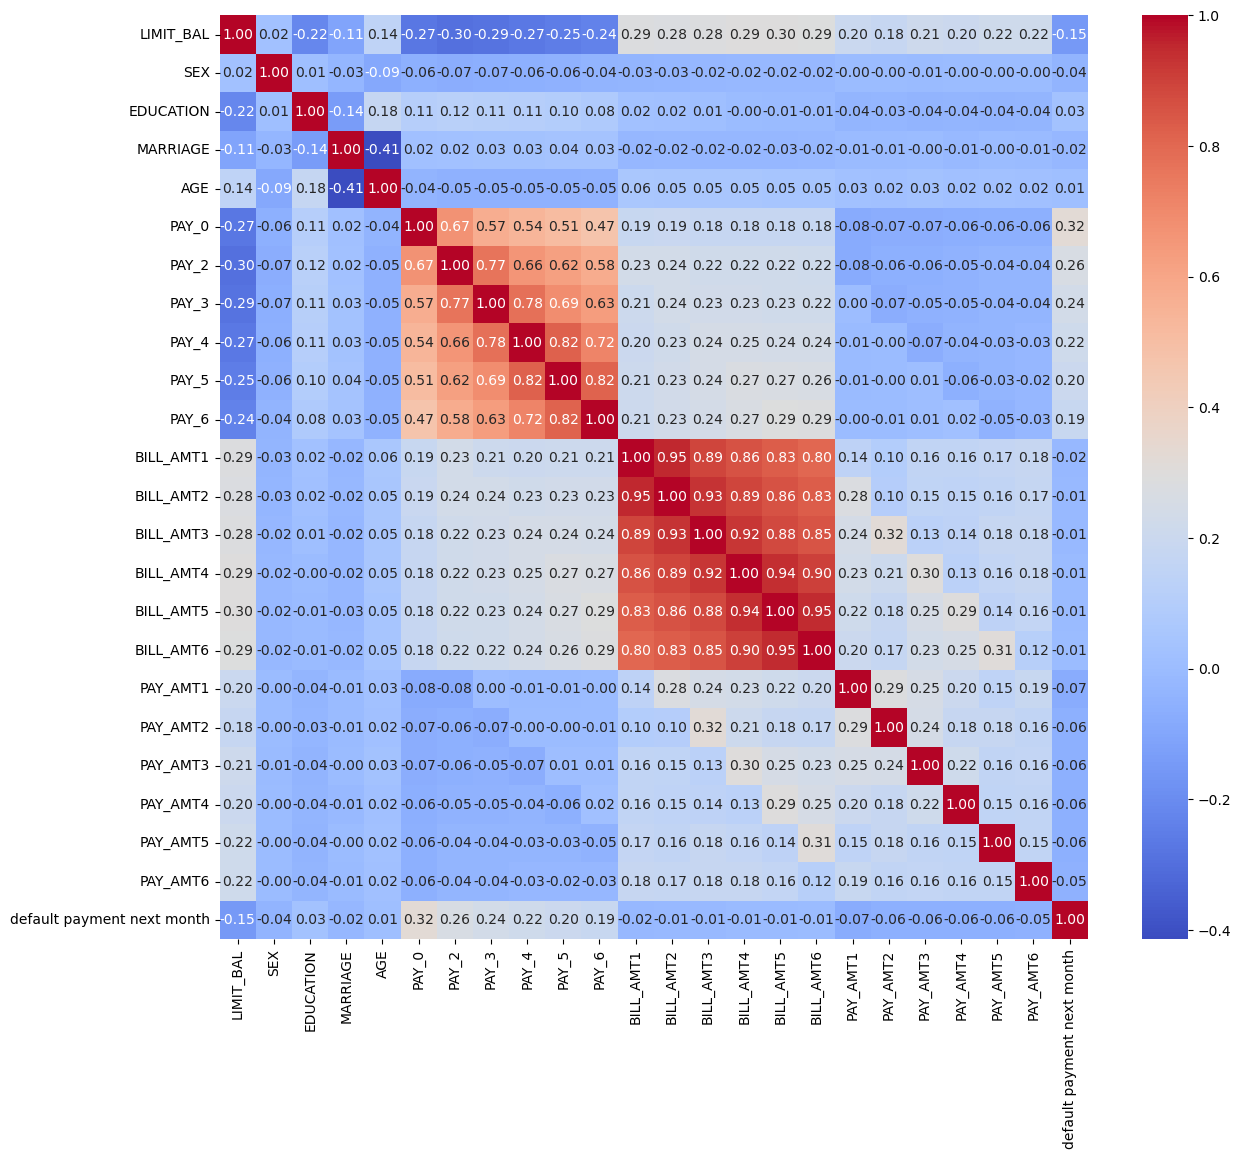

In [20]:
matriu_correlacio = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Mes gràfics --> Veure Carpeta de Gràfics